In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
palette = {
    "MYH7+_young": "#073E7F",
    "MYH7+_aged": "#83A0BE",
    "MYH2+_young": "#F49600",
    "MYH2+_aged": "#F9CB80",
    "MYH2⁺2+_young": "#866AA3",
    "MYH2⁺2+_aged": "#C1B7CF",
    "MYH1+_young": "#BE0E23",
    "MYH1+_aged": "#E18791"
}


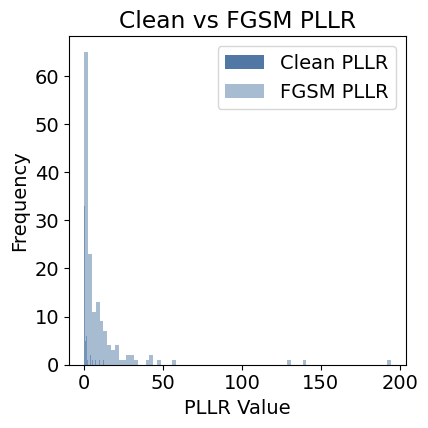

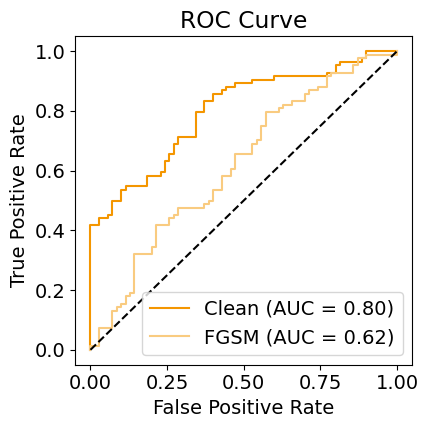

<ipython-input-3-d486a5be9556>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


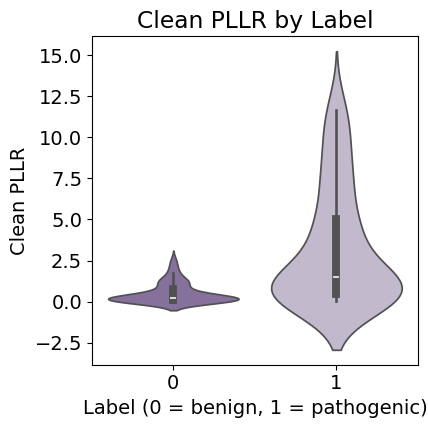

<ipython-input-3-d486a5be9556>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="PLLR_after_FGSM", data=df, palette=[palette["MYH1+_young"], palette["MYH1+_aged"]])


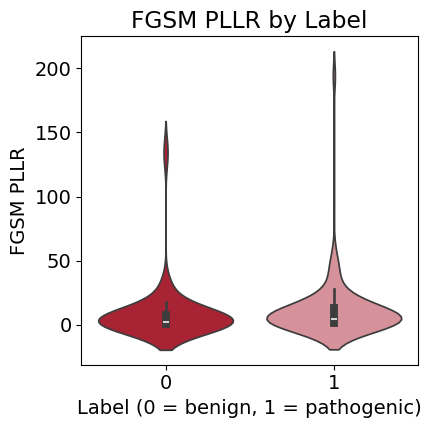

<ipython-input-3-d486a5be9556>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="label", y="delta_PLLR", data=df, palette=[palette["MYH2+_young"], palette["MYH2+_aged"]])


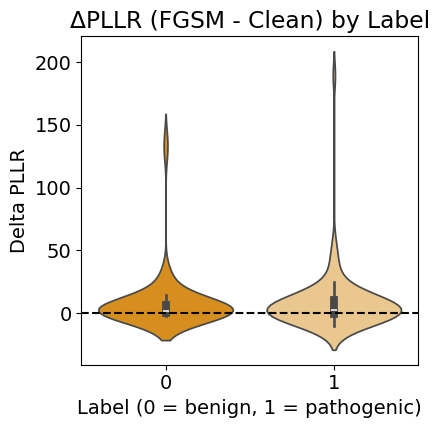

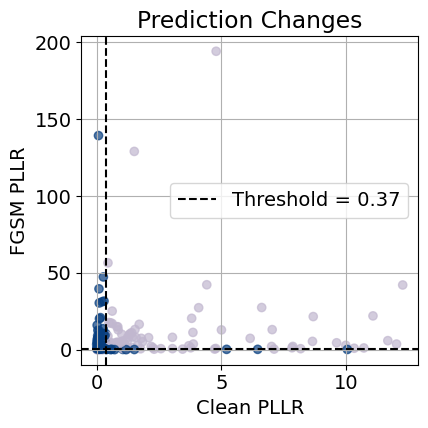

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Load data
df_clean = pd.read_csv("/content/drive/My Drive/vep_FGSM/output/callback_metrics/pllr_step_850.csv")
df_fgsm = pd.read_csv("/content/drive/My Drive/vep_FGSM/output/fgsm_pllr_results.csv")
df = df_clean.copy()
df["PLLR_after_FGSM"] = df_fgsm["PLLR_after_FGSM"]
df["delta_PLLR"] = df["PLLR_after_FGSM"] - df["PLLR"]

# Set font size and figure size
plt.rcParams.update({'font.size': 14})
FIGSIZE = (4.5, 4.5)

# 1. Histogram: Clean vs FGSM PLLR
plt.figure(figsize=FIGSIZE)
plt.hist(df["PLLR"], bins=80, alpha=0.7, label="Clean PLLR", color=palette["MYH7+_young"])
plt.hist(df["PLLR_after_FGSM"], bins=80, alpha=0.7, label="FGSM PLLR", color=palette["MYH7+_aged"])
plt.xlabel("PLLR Value")
plt.ylabel("Frequency")
plt.title("Clean vs FGSM PLLR")
plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig1_histogram_pllr.png", dpi=300)
plt.show()

# 2. ROC Curve
fpr_clean, tpr_clean, _ = roc_curve(df["label"], df["PLLR"])
fpr_fgsm, tpr_fgsm, _ = roc_curve(df["label"], df["PLLR_after_FGSM"])
auc_clean = roc_auc_score(df["label"], df["PLLR"])
auc_fgsm = roc_auc_score(df["label"], df["PLLR_after_FGSM"])

plt.figure(figsize=FIGSIZE)
plt.plot(fpr_clean, tpr_clean, color=palette["MYH2+_young"], label=f"Clean (AUC = {auc_clean:.2f})")
plt.plot(fpr_fgsm, tpr_fgsm, color=palette["MYH2+_aged"], label=f"FGSM (AUC = {auc_fgsm:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig2_roc_curve.png", dpi=300)
plt.show()

# 3. Violin Plot: Clean PLLR by Label
plt.figure(figsize=FIGSIZE)
sns.violinplot(
    x="label",
    y="PLLR",
    data=df,
    palette=[palette["MYH2⁺2+_young"], palette["MYH2⁺2+_aged"]]
)
plt.title("Clean PLLR by Label")
plt.xlabel("Label (0 = benign, 1 = pathogenic)")
plt.ylabel("Clean PLLR")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig3_violin_clean_pllr.png", dpi=300)
plt.show()

# 4. Violin Plot: FGSM PLLR by Label
plt.figure(figsize=FIGSIZE)
sns.violinplot(x="label", y="PLLR_after_FGSM", data=df, palette=[palette["MYH1+_young"], palette["MYH1+_aged"]])
plt.title("FGSM PLLR by Label")
plt.xlabel("Label (0 = benign, 1 = pathogenic)")
plt.ylabel("FGSM PLLR")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig4_violin_fgsm_pllr.png", dpi=300)
plt.show()

# 5. Violin Plot: ΔPLLR (FGSM - Clean) by Label
plt.figure(figsize=FIGSIZE)
sns.violinplot(x="label", y="delta_PLLR", data=df, palette=[palette["MYH2+_young"], palette["MYH2+_aged"]])
plt.axhline(0, color="black", linestyle="--")
plt.title("ΔPLLR (FGSM - Clean) by Label")
plt.xlabel("Label (0 = benign, 1 = pathogenic)")
plt.ylabel("Delta PLLR")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig5_violin_delta_pllr.png", dpi=300)
plt.show()

# 6. Scatter Plot: Threshold Crossing
fpr, tpr, thresholds = roc_curve(df["label"], df["PLLR"])
j_scores = tpr - fpr
optimal_idx = j_scores.argmax()
threshold = thresholds[optimal_idx]

df["pred_clean"] = (df["PLLR"] > threshold).astype(int)
df["pred_fgsm"] = (df["PLLR_after_FGSM"] > threshold).astype(int)
df["crossed"] = df["pred_clean"] != df["pred_fgsm"]

plt.figure(figsize=FIGSIZE)
colors = df["crossed"].map({True: palette["MYH7+_young"], False: palette["MYH2⁺2+_aged"]})
plt.scatter(df["PLLR"], df["PLLR_after_FGSM"], c=colors, alpha=0.7)
plt.axvline(threshold, color="black", linestyle="--", label=f"Threshold = {threshold:.2f}")
plt.axhline(threshold, color="black", linestyle="--")
#plt.plot([0, df["PLLR"].max()], [0, df["PLLR"].max()], 'k--', label="y = x")
plt.xlabel("Clean PLLR")
plt.ylabel("FGSM PLLR")
plt.title("Prediction Changes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/ig6_threshold_crossing_scatter.png", dpi=300)
plt.show()